# Action potential
The function `generate_noisy_action_potential()` create a 2D array of action potential. Assign a variable to this function to have the data. The APs are not aligned. You also don't know the number of AP that are in the simulation.

Your task is to:
- Plot the raw data.
- Align the data;
    - use the method `nanargmax()` of numpy
    - take 30 increment before and 70 increment after the position of the maximum.
- Calculate and plot the mean and standard deviation of those AP;
    - use the `fill_between()` method of matplotlib.

In the end, you should have something like:
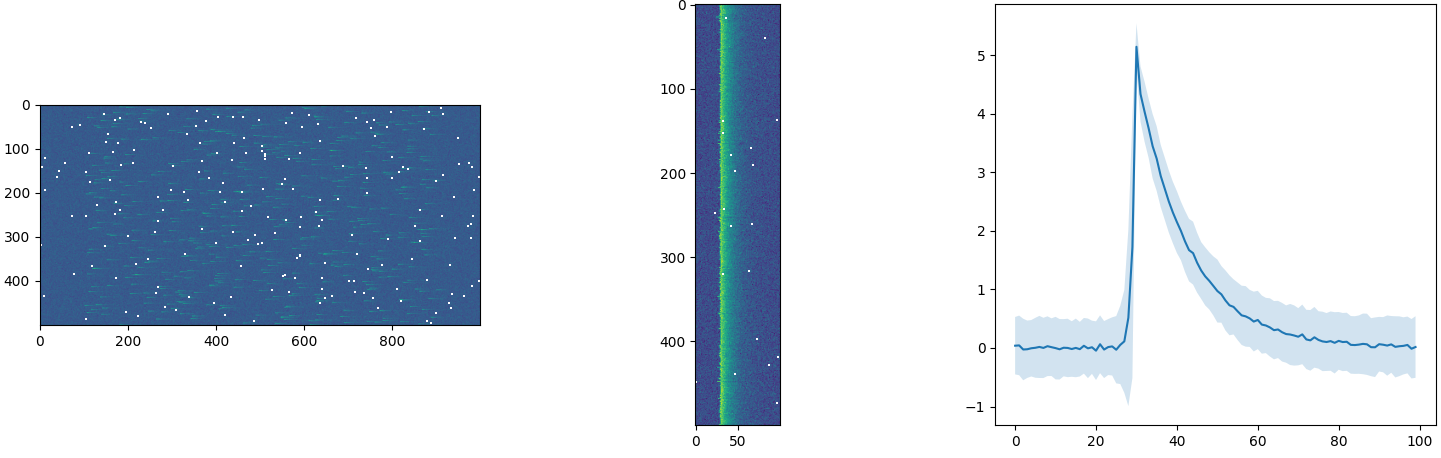

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:

def generate_noisy_action_potential():
    """Function that generate an array containing one action per row. The
    position of the action potential (AP) is random and there is noise induced
    in the dataset.

    Returns:
        np.array: Array containing the noisy data of the action potential.
    """

    # Initialise the data array
    array_size = (500, 1000)
    data = np.ones(array_size)

    # Generate time and action potential in the time
    time = np.linspace(0, array_size[1], array_size[1])
    action_potential = 5 * np.exp(-0.08 * time)

    # Random position of the AP
    for i in range(data.shape[0]):
        data[i, :] *= np.roll(action_potential, np.random.randint(100, 900))

    # Add noise and np.nan in the data
    noisy_data = np.random.normal(data, 0.5)
    noisy_data.ravel()[np.random.choice(noisy_data.size, 200, replace=False)] = np.nan

    return noisy_data

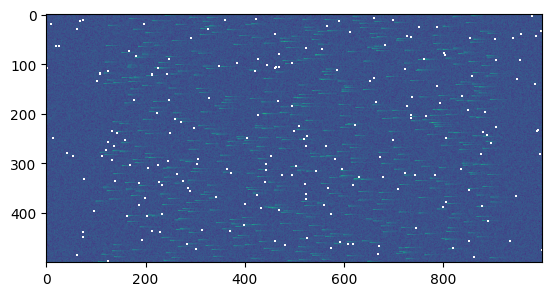

In [35]:
# plot the raw data
ap = generate_noisy_action_potential()
plt.imshow(ap)
plt.show()


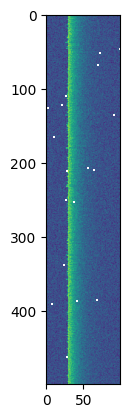

In [36]:
# Get the shape of the array
aligned_ap = np.zeros((ap.shape[0], 100))

# For each row, find the position of the max and use slicing to isolate 
# the signal.
for i in range(ap.shape[0]):
    ap_row = ap[i,:]
    ap_max_pos = np.nanargmax(ap_row)
    aligned_ap[i,:] = ap_row[ap_max_pos-30: ap_max_pos+70]

plt.imshow(aligned_ap)
plt.show()

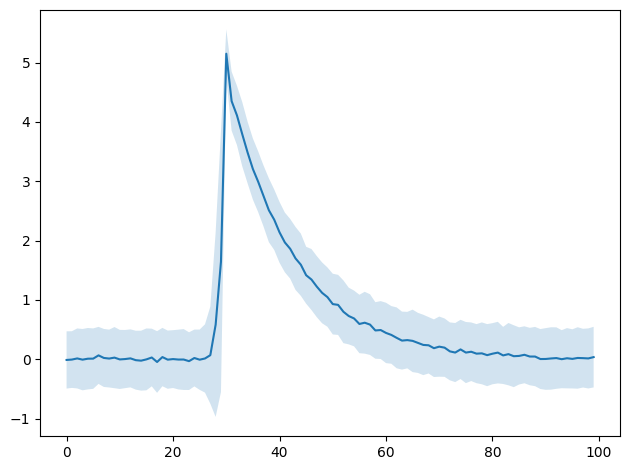

In [37]:
# There is a difference between nanmean and mean. Read the documentation!
mean_of_signal = np.nanmean(aligned_ap, axis=0)
std_of_signal = np.nanstd(aligned_ap, axis=0)

plt.plot(mean_of_signal)
# Read the documentation for this type of plot.
plt.fill_between(np.arange(0, 100), mean_of_signal-std_of_signal,
                 mean_of_signal + std_of_signal, alpha=0.2)
plt.tight_layout()
plt.show()